In [124]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

interval = [0, 1]

In [125]:
# helper functions

def make_grid(h):
    return np.arange(interval[0], interval[1], h)

def analytical(h):
    analytical = []
    grid = make_grid(h)
    for tn in grid:
        yn_1 = f_solve(tn)
        analytical.append(yn_1)
    analytical.append(f_solve(grid[-1]+grid[1]))
    return analytical

def make_results(grid, analytical, numerical):
    error = np.absolute(np.array(numerical) - np.array(analytical))
    error_scientific = []
    for x in error:
        error_scientific.append('{:.2e}'.format(x))
    df = pd.DataFrame([grid, analytical, numerical, error_scientific]).T
    df_middle = pd.DataFrame(['...', '...', '...', '...']).T.rename(index={0: '...'})
    df_middle.columns = ['t', 'analytical', 'numerical', '|numerical-analytical|']
    df.columns = ['t', 'analytical', 'numerical', '|numerical-analytical|']
    df.loc[len(grid), 't'] = grid[-1]+grid[1]
    make_plots(grid, analytical, numerical, error)
    return pd.concat([df.head(), df_middle, df.tail()])

def make_plots(grid, analytical, numerical, error):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
    grid = np.append(grid, grid[-1]+grid[1])
    ax1.plot(error, grid, 
             marker='s', markersize=9, markerfacecolor='blue',
             linestyle='-', linewidth=5, 
             color='cyan')
    ax1.grid(color='grey', linestyle='dotted')
    ax1.set_xlabel('error', fontsize=15)
    ax1.set_ylabel('t', fontsize=15)
    ax2.plot(grid, numerical, 'b-', label='numerical', alpha=0.50, linewidth=2)
    ax2.plot(grid, analytical, 'g:', label='analytical', alpha=0.75, linewidth=5)
    ax2.legend(loc='upper center', frameon=False)
    ax2.set_xlabel('y', fontsize=15)
    ax2.set_ylabel('t', fontsize=15)
    
# computes first n numerical values using classical runge-kutta method
def compute_first_elements(h, n):
    yn = 1.0
    elements = []
    grid = make_grid(h)
    elements.append(yn)
    for tn in grid[:n-1]:
        kn1 = f(tn, yn)
        kn2 = f(tn + h/2, yn + kn1*h/2)
        kn3 = f(tn + h/2, yn + kn2*h/2)
        kn4 = f(tn + h, yn + kn3*h)
        kn = (1/6)*(kn1 + 2*kn2 + 2*kn3 + kn4)
        yn_new = yn + h*kn
        elements.append(yn_new)
        yn = yn_new
    return elements

def f(t, y):
    return 4*t*y

def f_solve(t):
    return np.exp(2*t*t)

# Explicit Adams (3rd order)

In [126]:
def explicit_adams_3(h):
    numerical = []
    grid = make_grid(h)        
    yn_2, yn_1, yn = compute_first_elements(h, 3)
    numerical.extend([yn_2, yn_1, yn]) # append multiple elements
    for tn in grid[2:]:
        yn_new = yn + (h/12)*(23*f(tn, yn)-16*f(tn-h, yn_1)+5*f(tn-2*h, yn_2))
        numerical.append(yn_new)
        yn_2, yn_1, yn = yn_1, yn, yn_new
    return make_results(grid, analytical(h), numerical)

#### h = 0.1

,t,analytical,numerical,|numerical-analytical|
0,0.0,1.0,1.0,0.00e+00
1,0.1,1.020201,1.020201,6.69e-09
2,0.2,1.083287,1.083287,7.50e-08
3,0.3,1.197217,1.19498,2.24e-03
...,...,...,...,...
7,0.7,2.664456,2.620709,4.37e-02
8,0.8,3.59664,3.513522,8.31e-02
9,0.9,5.05309,4.893217,1.60e-01
10,1.0,7.389056,7.076184,3.13e-01


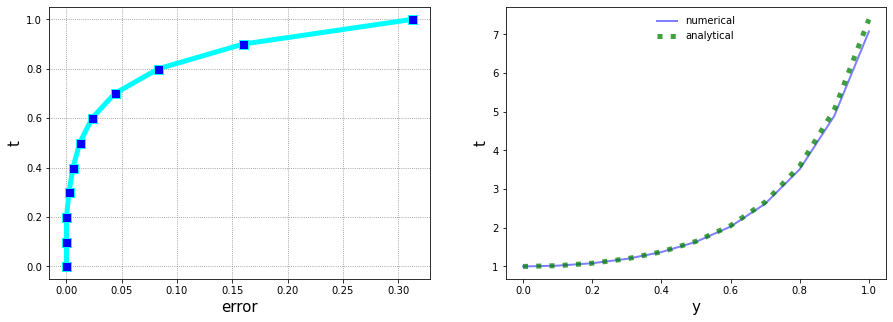

In [127]:
explicit_adams_3(0.1).drop([4, 6])

#### h = 0.05

,t,analytical,numerical,|numerical-analytical|
0,0.0,1.0,1.0,0.00e+00
1,0.05,1.005013,1.005013,2.61e-11
2,0.1,1.020201,1.020201,2.68e-10
3,0.15,1.046028,1.045909,1.19e-04
4,0.2,1.083287,1.083031,2.56e-04
...,...,...,...,...
16,0.8,3.59664,3.581857,1.48e-02
17,0.85,4.241852,4.221364,2.05e-02
18,0.9,5.05309,5.02454,2.86e-02
19,0.95,6.079971,6.039954,4.00e-02


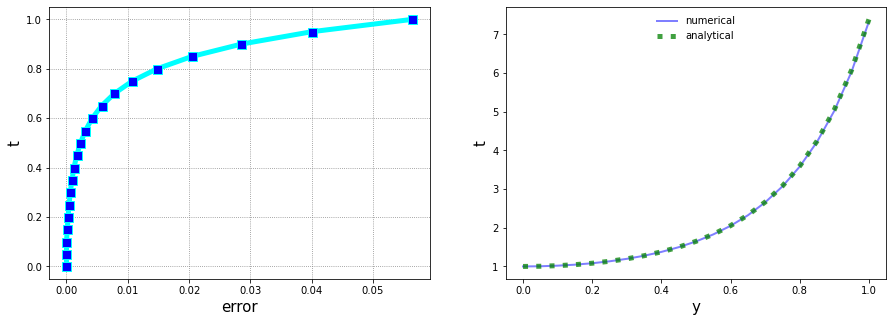

In [128]:
explicit_adams_3(0.05)

#### h = 0.025

,t,analytical,numerical,|numerical-analytical|
0,0.0,1.0,1.0,0.00e+00
1,0.025,1.001251,1.001251,1.02e-13
2,0.05,1.005013,1.005013,1.02e-12
3,0.075,1.011314,1.011306,7.13e-06
4,0.1,1.020201,1.020187,1.45e-05
...,...,...,...,...
36,0.9,5.05309,5.048881,4.21e-03
37,0.925,5.535877,5.530892,4.98e-03
38,0.95,6.079971,6.074059,5.91e-03
39,0.975,6.694257,6.687234,7.02e-03


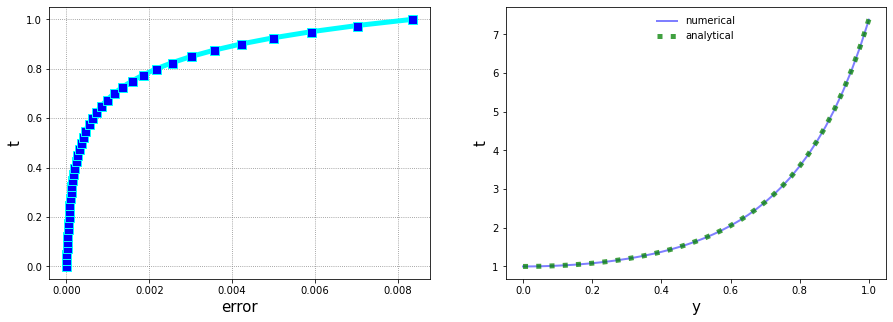

In [129]:
explicit_adams_3(0.025)

# Explicit Adams (4th order)

In [130]:
def explicit_adams_4(h):
    numerical = []
    grid = make_grid(h)        
    yn_3, yn_2, yn_1, yn = compute_first_elements(h, 4)
    numerical.extend([yn_3, yn_2, yn_1, yn]) # append multiple elements
    for tn in grid[3:]:
        yn_new = yn + (h/24)*(55*f(tn, yn)-59*f(tn-h, yn_1)+37*f(tn-2*h, yn_2)-9*f(tn-3*h, yn_3))
        numerical.append(yn_new)
        yn_3, yn_2, yn_1, yn = yn_2, yn_1, yn, yn_new
    return make_results(grid, analytical(h), numerical)

#### h = 0.1

,t,analytical,numerical,|numerical-analytical|
0,0.0,1.0,1.0,0.00e+00
1,0.1,1.020201,1.020201,6.69e-09
2,0.2,1.083287,1.083287,7.50e-08
3,0.3,1.197217,1.197217,3.55e-07
...,...,...,...,...
7,0.7,2.664456,2.650974,1.35e-02
8,0.8,3.59664,3.568553,2.81e-02
9,0.9,5.05309,4.995109,5.80e-02
10,1.0,7.389056,7.268813,1.20e-01


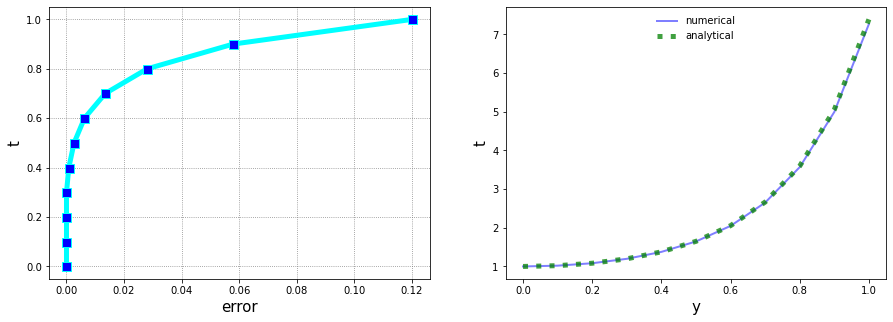

In [131]:
explicit_adams_4(0.1).drop([4, 6])

#### h = 0.05

,t,analytical,numerical,|numerical-analytical|
0,0.0,1.0,1.0,0.00e+00
1,0.05,1.005013,1.005013,2.61e-11
2,0.1,1.020201,1.020201,2.68e-10
3,0.15,1.046028,1.046028,1.02e-09
4,0.2,1.083287,1.083276,1.07e-05
...,...,...,...,...
16,0.8,3.59664,3.593684,2.96e-03
17,0.85,4.241852,4.237628,4.22e-03
18,0.9,5.05309,5.047035,6.06e-03
19,0.95,6.079971,6.071258,8.71e-03


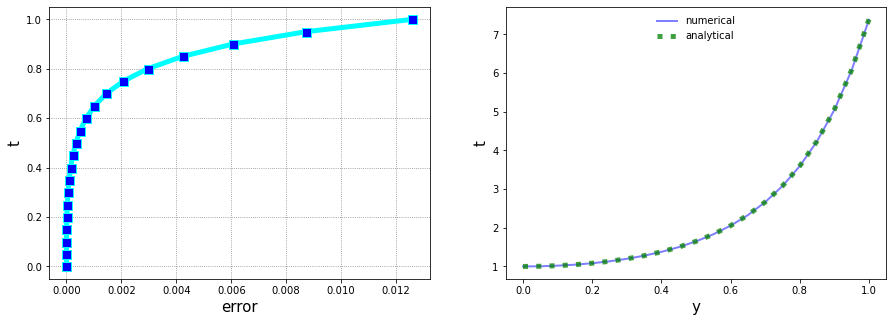

In [132]:
explicit_adams_4(0.05)

#### h = 0.025

,t,analytical,numerical,|numerical-analytical|
0,0.0,1.0,1.0,0.00e+00
1,0.025,1.001251,1.001251,1.02e-13
2,0.05,1.005013,1.005013,1.02e-12
3,0.075,1.011314,1.011314,3.67e-12
4,0.1,1.020201,1.020201,1.61e-07
...,...,...,...,...
36,0.9,5.05309,5.052607,4.84e-04
37,0.925,5.535877,5.535297,5.80e-04
38,0.95,6.079971,6.079274,6.97e-04
39,0.975,6.694257,6.693418,8.39e-04


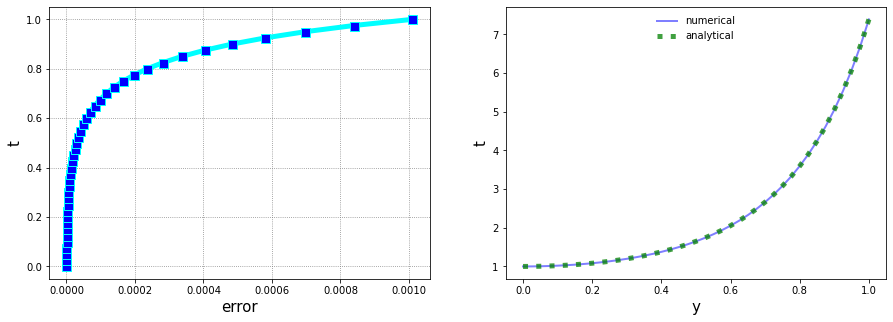

In [133]:
explicit_adams_4(0.025)

# Implicit Adams (3rd order)

In [134]:
def implicit_adams_3(h, eps):
    numerical = []
    grid = make_grid(h)        
    yn_2, yn_1, yn = compute_first_elements(h, 3)
    numerical.extend([yn_2, yn_1, yn])
    for tn in grid[2:]:
        yk = yn + (h/12)*(23*f(tn, yn)-16*f(tn-h, yn_1)+5*f(tn-2*h, yn_2)) # explicit adams
        while True:
            yk_1 = yn + (h/12)*(5*f(tn+h, yk)+8*f(tn, yn)-f(tn-h, yn_1))
            if abs(yk_1-yk) < eps:
                break
            yk = yk_1
        yn_new = yn + (h/12)*(5*f(tn+h, yk_1)+8*f(tn, yn)-f(tn-h, yn_1))
        numerical.append(yn_new)
        yn_1, yn = yn, yn_new
    return make_results(grid, analytical(h), numerical)

#### h = 0.1

,t,analytical,numerical,|numerical-analytical|
0,0.0,1.0,1.0,0.00e+00
1,0.1,1.020201,1.020201,6.69e-09
2,0.2,1.083287,1.083287,7.50e-08
3,0.3,1.197217,1.197539,3.21e-04
...,...,...,...,...
7,0.7,2.664456,2.671496,7.04e-03
8,0.8,3.59664,3.610401,1.38e-02
9,0.9,5.05309,5.080335,2.72e-02
10,1.0,7.389056,7.444006,5.49e-02


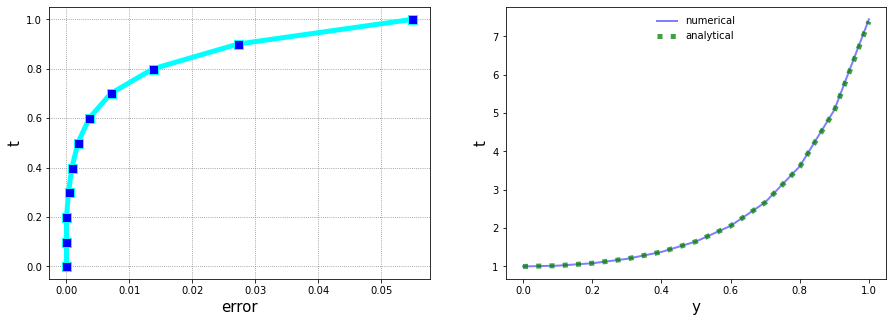

In [135]:
implicit_adams_3(0.1, 0.000001).drop([4, 6])

#### h = 0.05

,t,analytical,numerical,|numerical-analytical|
0,0.0,1.0,1.0,0.00e+00
1,0.05,1.005013,1.005013,2.61e-11
2,0.1,1.020201,1.020201,2.68e-10
3,0.15,1.046028,1.046042,1.42e-05
4,0.2,1.083287,1.083318,3.08e-05
...,...,...,...,...
16,0.8,3.59664,3.598616,1.98e-03
17,0.85,4.241852,4.244607,2.76e-03
18,0.9,5.05309,5.056953,3.86e-03
19,0.95,6.079971,6.085417,5.45e-03


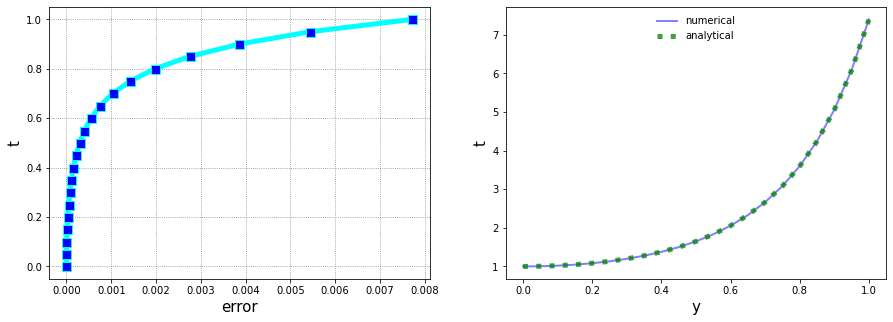

In [136]:
implicit_adams_3(0.05, 0.000001)

#### h = 0.025

,t,analytical,numerical,|numerical-analytical|
0,0.0,1.0,1.0,0.00e+00
1,0.025,1.001251,1.001251,1.02e-13
2,0.05,1.005013,1.005013,1.02e-12
3,0.075,1.011314,1.011314,8.07e-07
4,0.1,1.020201,1.020203,1.65e-06
...,...,...,...,...
36,0.9,5.05309,5.053605,5.15e-04
37,0.925,5.535877,5.536487,6.10e-04
38,0.95,6.079971,6.080696,7.25e-04
39,0.975,6.694257,6.695119,8.62e-04


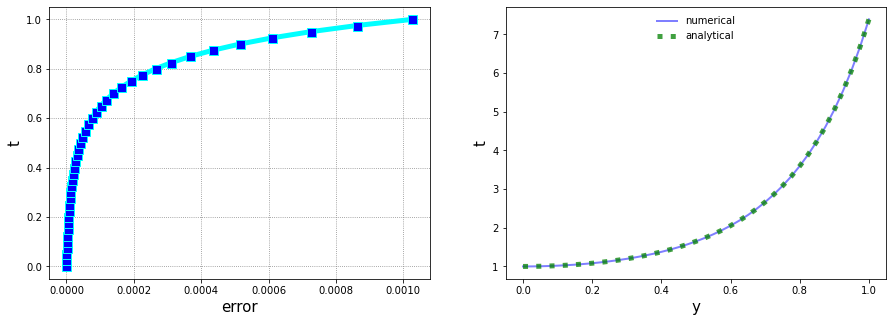

In [137]:
implicit_adams_3(0.025, 0.000001)

# Implicit Adams (4th order)

In [138]:
def implicit_adams_4(h, eps):
    numerical = []
    grid = make_grid(h)        
    yn_3, yn_2, yn_1, yn = compute_first_elements(h, 4)
    numerical.extend([yn_3, yn_2, yn_1, yn])
    for tn in grid[3:]:
        yk = yn + (h/24)*(55*f(tn, yn)-59*f(tn-h, yn_1)+37*f(tn-2*h, yn_2)-9*f(tn-3*h, yn_3))
        while True:
            yk_1 = yn + (h/24)*(9*f(tn+h, yk)+19*f(tn, yn)-5*f(tn-h, yn_1)+f(tn-2*h, yn_2))
            if abs(yk_1-yk) < eps:
                break
            yk = yk_1
        yn_new = yn + (h/24)*(9*f(tn+h, yk_1)+19*f(tn, yn)-5*f(tn-h, yn_1)+f(tn-2*h, yn_2))
        numerical.append(yn_new)
        yn_3, yn_2, yn_1, yn = yn_2, yn_1, yn, yn_new
    return make_results(grid, analytical(h), numerical)    

#### h = 0.1

,t,analytical,numerical,|numerical-analytical|
0,0.0,1.0,1.0,0.00e+00
1,0.1,1.020201,1.020201,6.69e-09
2,0.2,1.083287,1.083287,7.50e-08
3,0.3,1.197217,1.197217,3.55e-07
...,...,...,...,...
7,0.7,2.664456,2.666077,1.62e-03
8,0.8,3.59664,3.600046,3.41e-03
9,0.9,5.05309,5.060218,7.13e-03
10,1.0,7.389056,7.404095,1.50e-02


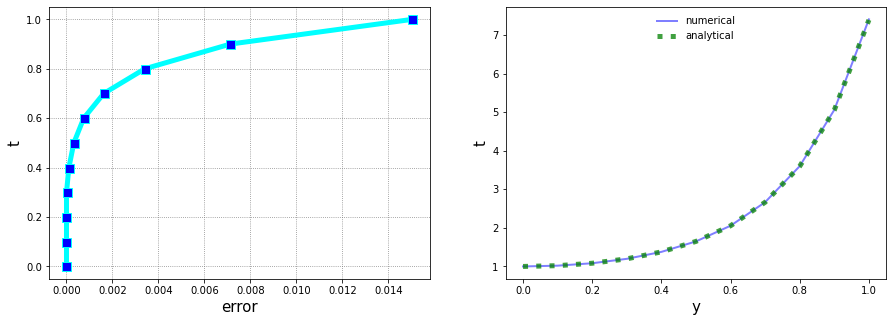

In [139]:
implicit_adams_4(0.1, 0.000001).drop([4, 6])

#### h = 0.05

,t,analytical,numerical,|numerical-analytical|
0,0.0,1.0,1.0,0.00e+00
1,0.05,1.005013,1.005013,2.61e-11
2,0.1,1.020201,1.020201,2.68e-10
3,0.15,1.046028,1.046028,1.02e-09
4,0.2,1.083287,1.083288,1.19e-06
...,...,...,...,...
16,0.8,3.59664,3.596922,2.82e-04
17,0.85,4.241852,4.242257,4.04e-04
18,0.9,5.05309,5.053672,5.81e-04
19,0.95,6.079971,6.08081,8.39e-04


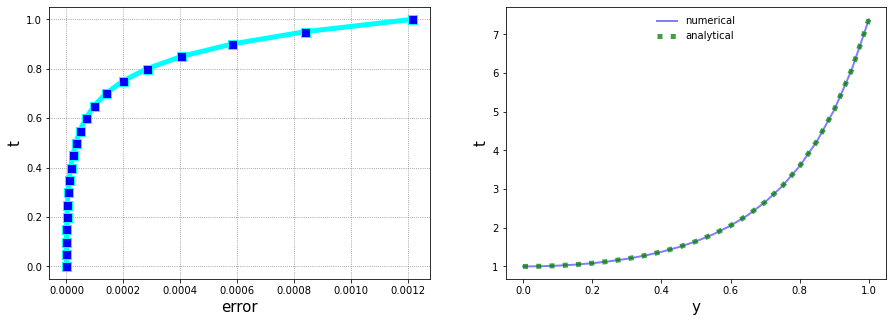

In [140]:
implicit_adams_4(0.05, 0.000001)

#### h = 0.025

,t,analytical,numerical,|numerical-analytical|
0,0.0,1.0,1.0,0.00e+00
1,0.025,1.001251,1.001251,1.02e-13
2,0.05,1.005013,1.005013,1.02e-12
3,0.075,1.011314,1.011314,3.67e-12
4,0.1,1.020201,1.020201,1.72e-08
...,...,...,...,...
36,0.9,5.05309,5.053132,4.13e-05
37,0.925,5.535877,5.535927,4.96e-05
38,0.95,6.079971,6.080031,5.96e-05
39,0.975,6.694257,6.694329,7.17e-05


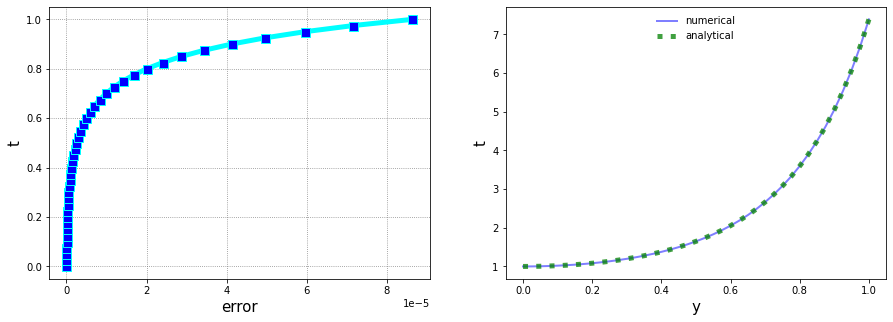

In [141]:
implicit_adams_4(0.025, 0.000001)

# Predictor-Corrector (4th order)

In [142]:
def predictor_corrector(h):
    numerical = []
    grid = make_grid(h)        
    yn_3, yn_2, yn_1, yn = compute_first_elements(h, 4)
    numerical.extend([yn_3, yn_2, yn_1, yn])
    for tn in grid[3:]:
        yn_pred = yn + (h/24)*(55*f(tn, yn)-59*f(tn-h, yn_1)+37*f(tn-2*h, yn_2)-9*f(tn-3*h, yn_3))
        yn_corr = yn + (h/24)*(9*f(tn+h, yn_pred)+19*f(tn, yn)-5*f(tn-h, yn_1)+f(tn-2*h, yn_2))
        numerical.append(yn_corr)
        yn_3, yn_2, yn_1, yn = yn_2, yn_1, yn, yn_pred
    return make_results(grid, analytical(h), numerical)

#### h = 0.1

,t,analytical,numerical,|numerical-analytical|
0,0.0,1.0,1.0,0.00e+00
1,0.1,1.020201,1.020201,6.69e-09
2,0.2,1.083287,1.083287,7.50e-08
3,0.3,1.197217,1.197217,3.55e-07
...,...,...,...,...
7,0.7,2.664456,2.65628,8.18e-03
8,0.8,3.59664,3.578141,1.85e-02
9,0.9,5.05309,5.012768,4.03e-02
10,1.0,7.389056,7.302062,8.70e-02


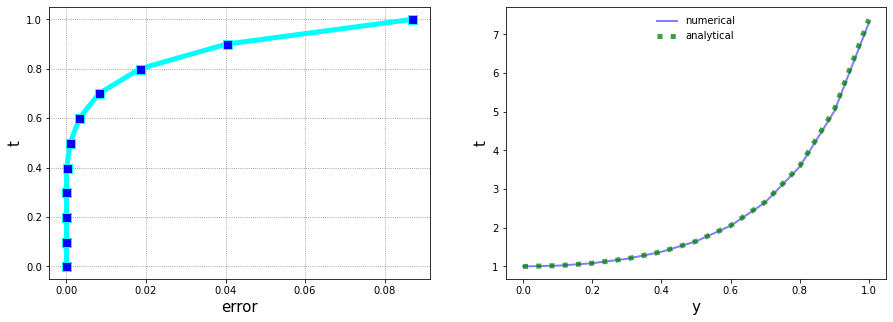

In [143]:
predictor_corrector(0.1).drop([4, 6])

#### h = 0.05

,t,analytical,numerical,|numerical-analytical|
0,0.0,1.0,1.0,0.00e+00
1,0.05,1.005013,1.005013,2.61e-11
2,0.1,1.020201,1.020201,2.68e-10
3,0.15,1.046028,1.046028,1.02e-09
4,0.2,1.083287,1.083288,1.01e-06
...,...,...,...,...
16,0.8,3.59664,3.594229,2.41e-03
17,0.85,4.241852,4.238375,3.48e-03
18,0.9,5.05309,5.048066,5.02e-03
19,0.95,6.079971,6.072689,7.28e-03


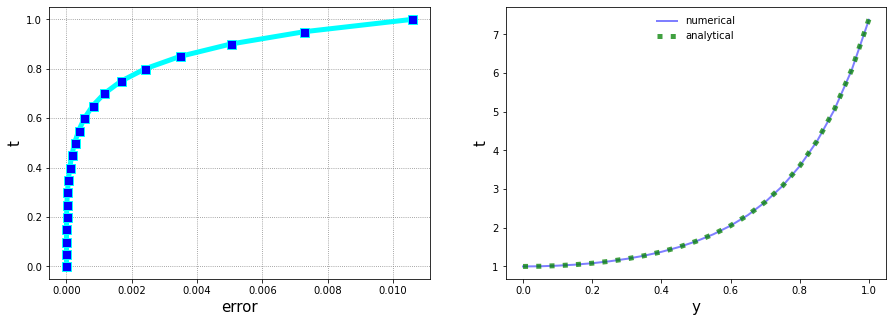

In [144]:
predictor_corrector(0.05)

#### h = 0.025

,t,analytical,numerical,|numerical-analytical|
0,0.0,1.0,1.0,0.00e+00
1,0.025,1.001251,1.001251,1.02e-13
2,0.05,1.005013,1.005013,1.02e-12
3,0.075,1.011314,1.011314,3.67e-12
4,0.1,1.020201,1.020201,1.65e-08
...,...,...,...,...
36,0.9,5.05309,5.052651,4.39e-04
37,0.925,5.535877,5.535349,5.28e-04
38,0.95,6.079971,6.079336,6.35e-04
39,0.975,6.694257,6.693492,7.65e-04


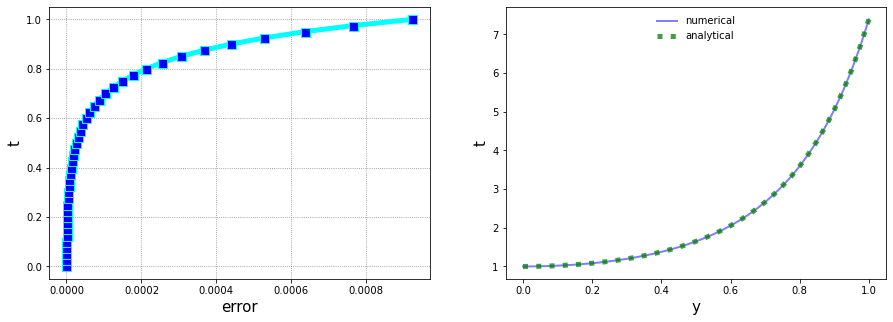

In [145]:
predictor_corrector(0.025)